# 1. Problem Statement: The ‘Hair Salon.csv’View in a new window dataset contains various variables used for the context of Market Segmentation. This particular case study is based on various parameters of a salon chain of hair products. You are expected to do Principal Component Analysis for this case study according to the instructions given in the rubric.

Note: This particular dataset contains the target variable satisfaction as well. Please do drop this variable before doing Principal Component Analysis.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      
from statsmodels.stats.anova import _get_covariance,anova_lm 
%matplotlib inline
import warnings

In [3]:
import os

In [4]:
os.getcwd()

'/Users/sharageorgevaidian'

In [5]:
os.chdir('/Users/sharageorgevaidian/Downloads')

In [5]:
df=pd.read_csv('Hair Salon.csv')

In [6]:
df

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,1,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7,8.2
1,2,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9,5.7
2,3,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5,8.9
3,4,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0,4.8
4,5,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,8.6,4.8,5.6,5.3,2.3,6.0,5.7,6.7,5.8,4.9,3.6,7.3
96,97,7.4,3.4,2.6,5.0,4.1,4.4,4.8,7.2,4.5,4.2,3.7,6.3
97,98,8.7,3.2,3.3,3.2,3.1,6.1,2.9,5.6,5.0,3.1,2.5,5.4
98,99,7.8,4.9,5.8,5.3,5.2,5.3,7.1,7.9,6.0,4.3,3.9,6.4


In [7]:
df.head()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,1,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7,8.2
1,2,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9,5.7
2,3,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5,8.9
3,4,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0,4.8
4,5,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5,7.1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            100 non-null    int64  
 1   ProdQual      100 non-null    float64
 2   Ecom          100 non-null    float64
 3   TechSup       100 non-null    float64
 4   CompRes       100 non-null    float64
 5   Advertising   100 non-null    float64
 6   ProdLine      100 non-null    float64
 7   SalesFImage   100 non-null    float64
 8   ComPricing    100 non-null    float64
 9   WartyClaim    100 non-null    float64
 10  OrdBilling    100 non-null    float64
 11  DelSpeed      100 non-null    float64
 12  Satisfaction  100 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 10.3 KB


In [9]:
df.shape

(100, 13)

In [10]:
df.isnull().sum()

ID              0
ProdQual        0
Ecom            0
TechSup         0
CompRes         0
Advertising     0
ProdLine        0
SalesFImage     0
ComPricing      0
WartyClaim      0
OrdBilling      0
DelSpeed        0
Satisfaction    0
dtype: int64

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,100.0,50.500,29.011492,1.0,25.750,50.50,75.250,100.0
ProdQual,100.0,7.810,1.396279,5.0,6.575,8.00,9.100,10.0
Ecom,100.0,3.672,0.700516,2.2,3.275,3.60,3.925,5.7
TechSup,100.0,5.365,1.530457,1.3,4.250,5.40,6.625,8.5
CompRes,100.0,5.442,1.208403,2.6,4.600,5.45,6.325,7.8
Advertising,100.0,4.010,1.126943,1.9,3.175,4.00,4.800,6.5
ProdLine,100.0,5.805,1.315285,2.3,4.700,5.75,6.800,8.4
SalesFImage,100.0,5.123,1.072320,2.9,4.500,4.90,5.800,8.2
ComPricing,100.0,6.974,1.545055,3.7,5.875,7.10,8.400,9.9
WartyClaim,100.0,6.043,0.819738,4.1,5.400,6.10,6.600,8.1


In [12]:
df.drop(['Satisfaction'], inplace=True, axis=1)


In [13]:
df

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
0,1,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7
1,2,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9
2,3,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5
3,4,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0
4,5,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,8.6,4.8,5.6,5.3,2.3,6.0,5.7,6.7,5.8,4.9,3.6
96,97,7.4,3.4,2.6,5.0,4.1,4.4,4.8,7.2,4.5,4.2,3.7
97,98,8.7,3.2,3.3,3.2,3.1,6.1,2.9,5.6,5.0,3.1,2.5
98,99,7.8,4.9,5.8,5.3,5.2,5.3,7.1,7.9,6.0,4.3,3.9


In [14]:
df_dup= df.duplicated()
df_dup.sum()

0

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,100.0,50.500,29.011492,1.0,25.750,50.50,75.250,100.0
ProdQual,100.0,7.810,1.396279,5.0,6.575,8.00,9.100,10.0
Ecom,100.0,3.672,0.700516,2.2,3.275,3.60,3.925,5.7
TechSup,100.0,5.365,1.530457,1.3,4.250,5.40,6.625,8.5
CompRes,100.0,5.442,1.208403,2.6,4.600,5.45,6.325,7.8
Advertising,100.0,4.010,1.126943,1.9,3.175,4.00,4.800,6.5
ProdLine,100.0,5.805,1.315285,2.3,4.700,5.75,6.800,8.4
SalesFImage,100.0,5.123,1.072320,2.9,4.500,4.90,5.800,8.2
ComPricing,100.0,6.974,1.545055,3.7,5.875,7.10,8.400,9.9
WartyClaim,100.0,6.043,0.819738,4.1,5.400,6.10,6.600,8.1


In [16]:
df.shape

(100, 12)

## 1. Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. The inferences drawn from this should be properly documented.

## UNIVARIATE ANALYSIS

<AxesSubplot:xlabel='ID'>

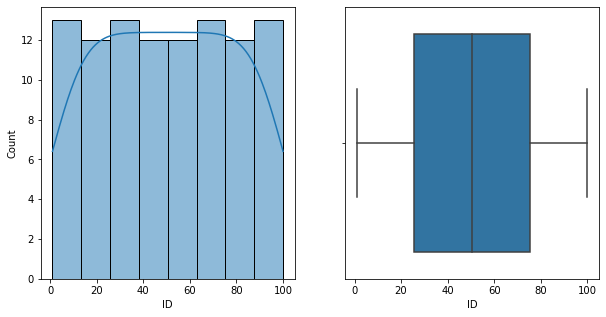

In [17]:
import matplotlib.pyplot as plt
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df.ID, kde=True, ax=axs[0])
sns.boxplot(x='ID',data=df, ax=axs[1])

<AxesSubplot:xlabel='ProdQual'>

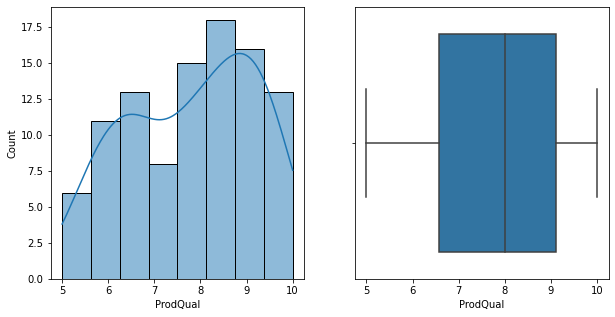

In [18]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df.ProdQual, kde=True, ax=axs[0])
sns.boxplot(x='ProdQual',data=df, ax=axs[1])

<AxesSubplot:xlabel='Ecom'>

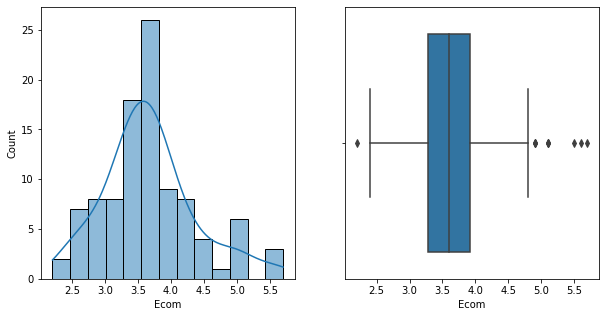

In [19]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df.Ecom, kde=True, ax=axs[0])
sns.boxplot(x='Ecom',data=df, ax=axs[1])

<AxesSubplot:xlabel='TechSup'>

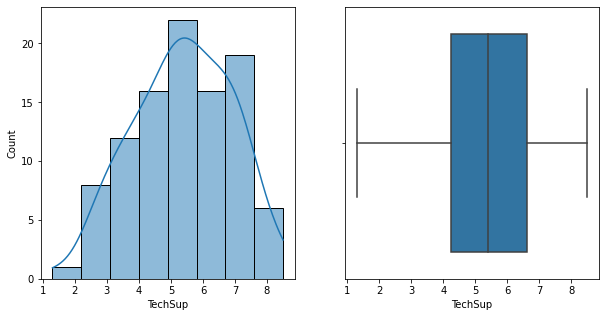

In [20]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df.TechSup, kde=True, ax=axs[0])
sns.boxplot(x='TechSup',data=df, ax=axs[1])

<AxesSubplot:xlabel='CompRes'>

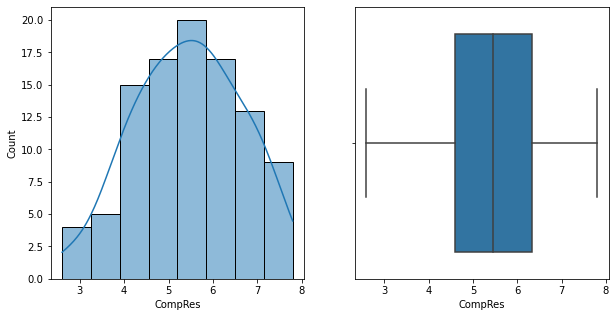

In [21]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df.CompRes, kde=True, ax=axs[0])
sns.boxplot(x='CompRes',data=df, ax=axs[1])

<AxesSubplot:xlabel='Advertising'>

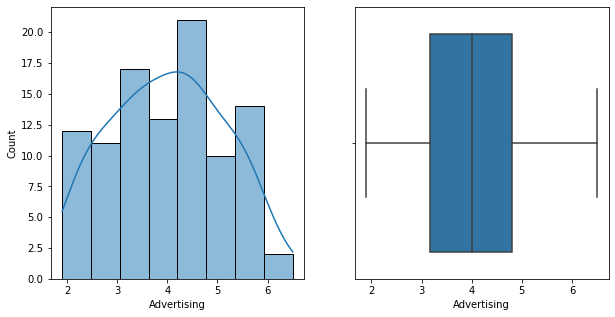

In [22]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df.Advertising, kde=True, ax=axs[0])
sns.boxplot(x='Advertising',data=df, ax=axs[1])

<AxesSubplot:xlabel='ProdLine'>

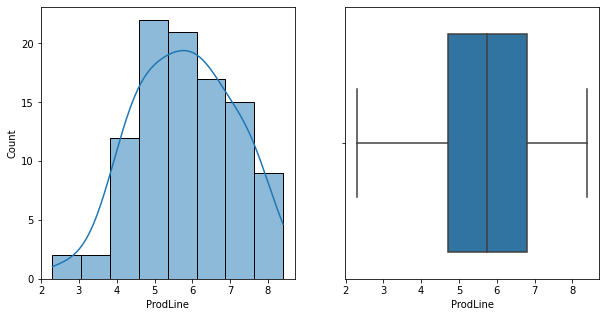

In [23]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df.ProdLine, kde=True, ax=axs[0])
sns.boxplot(x='ProdLine',data=df, ax=axs[1])

<AxesSubplot:xlabel='SalesFImage'>

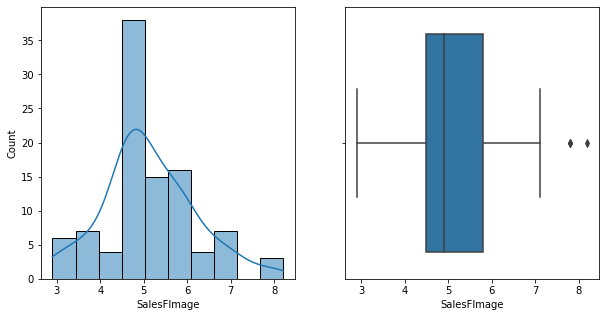

In [24]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df.SalesFImage, kde=True, ax=axs[0])
sns.boxplot(x='SalesFImage',data=df, ax=axs[1])

<AxesSubplot:xlabel='ComPricing'>

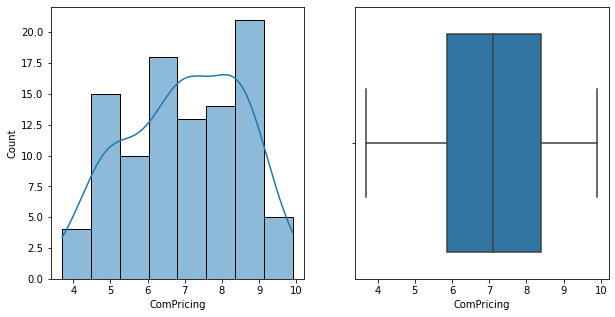

In [25]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df.ComPricing, kde=True, ax=axs[0])
sns.boxplot(x='ComPricing',data=df, ax=axs[1])

<AxesSubplot:xlabel='WartyClaim'>

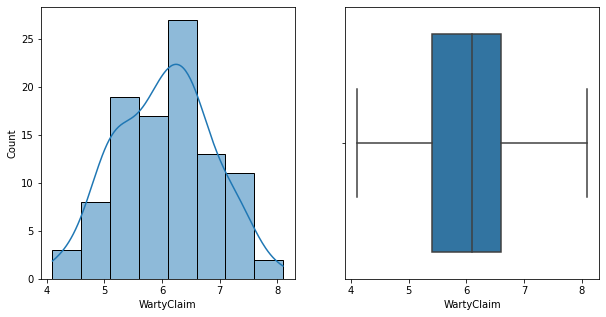

In [26]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df.WartyClaim, kde=True, ax=axs[0])
sns.boxplot(x='WartyClaim',data=df, ax=axs[1])

<AxesSubplot:xlabel='OrdBilling'>

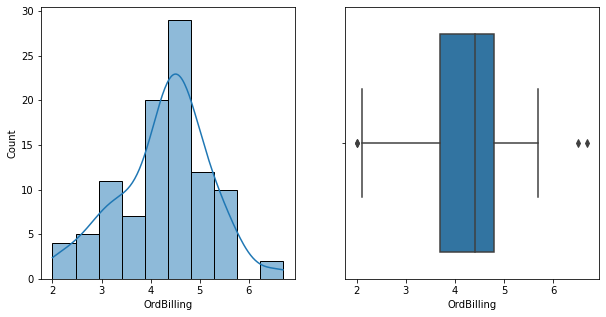

In [27]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df.OrdBilling, kde=True, ax=axs[0])
sns.boxplot(x='OrdBilling',data=df, ax=axs[1])

<AxesSubplot:xlabel='DelSpeed'>

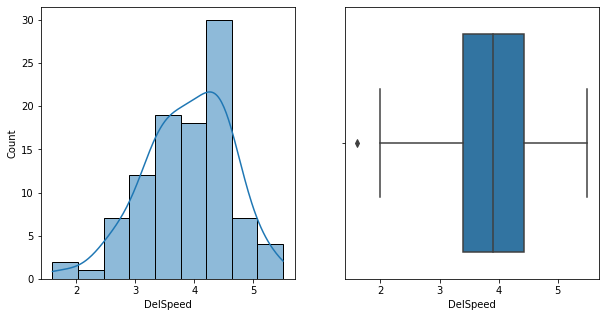

In [28]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df.DelSpeed, kde=True, ax=axs[0])
sns.boxplot(x='DelSpeed',data=df, ax=axs[1])

## MULTIVARIATE ANALYSIS

<Figure size 864x864 with 0 Axes>

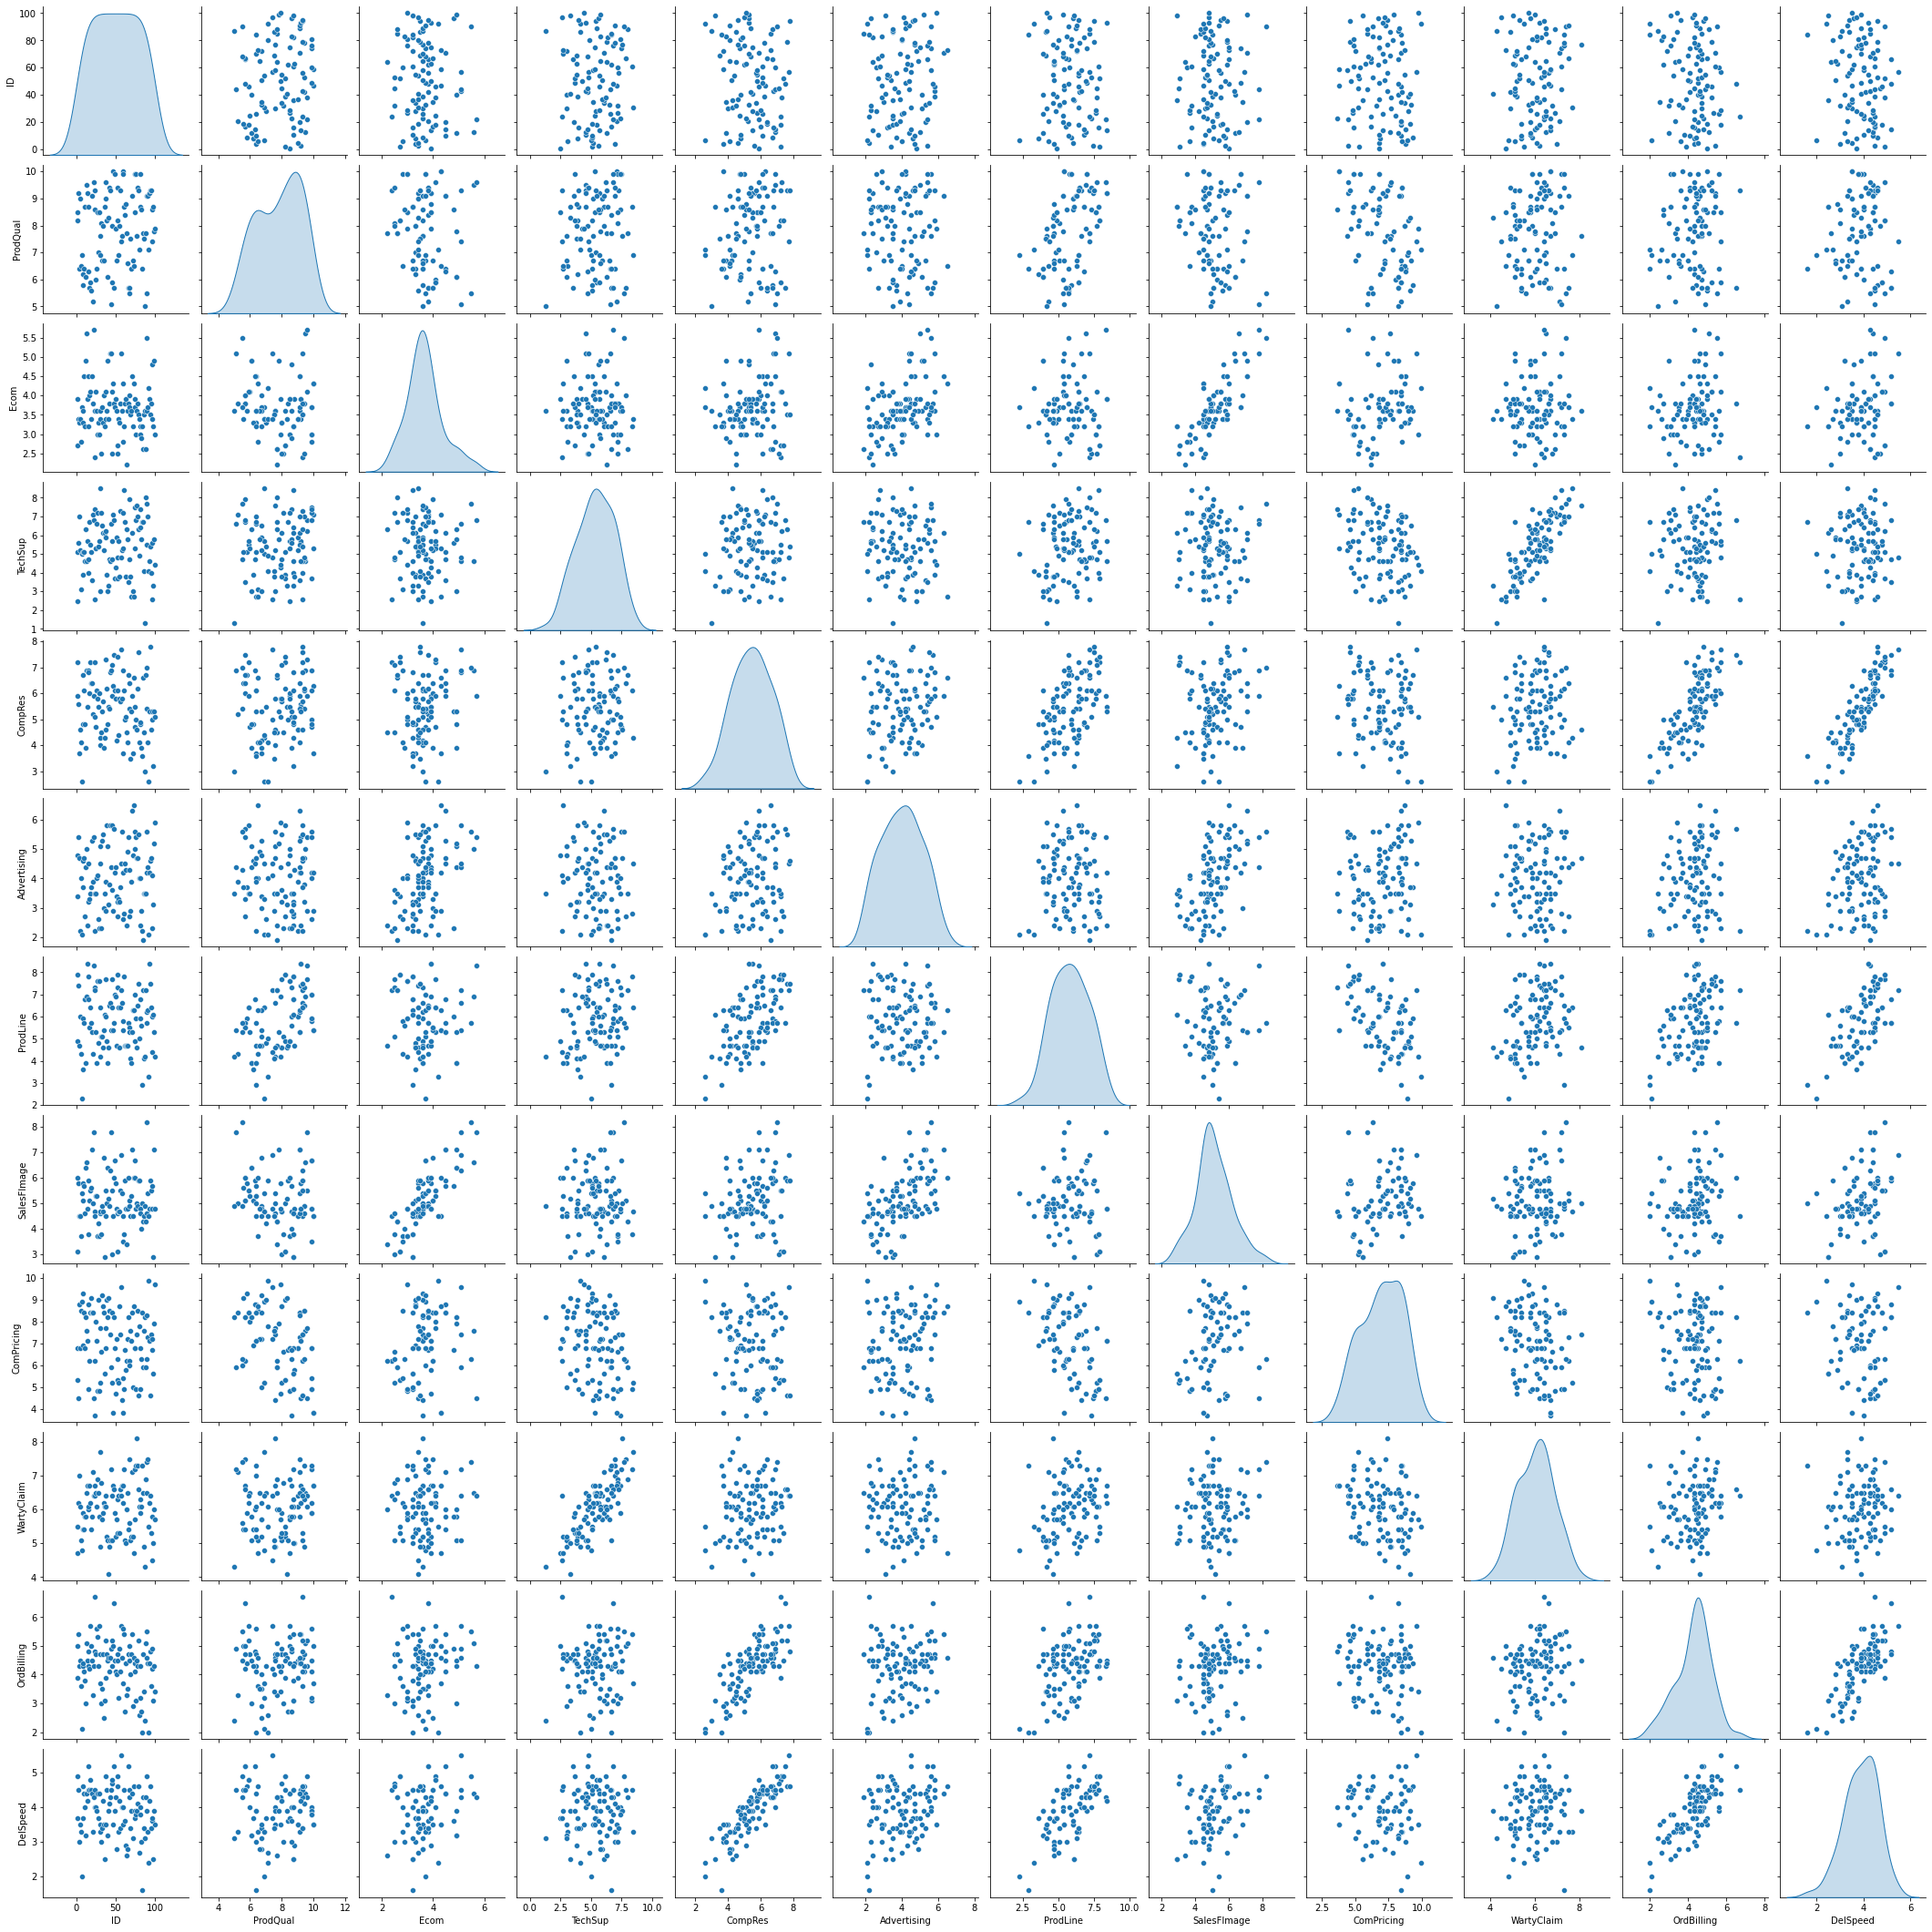

In [29]:
plt.figure(figsize=(12,12))
sns.pairplot(df, diag_kind='kde')
plt.show()

In [30]:
df_1 = df.corr()
df_1

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
ID,1.000000,0.145774,-0.046173,0.031838,-0.144322,0.073129,-0.048641,0.013848,-0.063007,0.058592,-0.178352,-0.172134
ProdQual,0.145774,1.000000,-0.137163,0.095600,0.106370,-0.053473,0.477493,-0.151813,-0.401282,0.088312,0.104303,0.027718
Ecom,-0.046173,-0.137163,1.000000,0.000867,0.140179,0.429891,-0.052688,0.791544,0.229462,0.051898,0.156147,0.191636
TechSup,0.031838,0.095600,0.000867,1.000000,0.096657,-0.062870,0.192625,0.016991,-0.270787,0.797168,0.080102,0.025441
CompRes,-0.144322,0.106370,0.140179,0.096657,1.000000,0.196917,0.561417,0.229752,-0.127954,0.140408,0.756869,0.865092
Advertising,0.073129,-0.053473,0.429891,-0.062870,0.196917,1.000000,-0.011551,0.542204,0.134217,0.010792,0.184236,0.275863
ProdLine,-0.048641,0.477493,-0.052688,0.192625,0.561417,-0.011551,1.000000,-0.061316,-0.494948,0.273078,0.424408,0.601850
SalesFImage,0.013848,-0.151813,0.791544,0.016991,0.229752,0.542204,-0.061316,1.000000,0.264597,0.107455,0.195127,0.271551
ComPricing,-0.063007,-0.401282,0.229462,-0.270787,-0.127954,0.134217,-0.494948,0.264597,1.000000,-0.244986,-0.114567,-0.072872
WartyClaim,0.058592,0.088312,0.051898,0.797168,0.140408,0.010792,0.273078,0.107455,-0.244986,1.000000,0.197065,0.109395


<AxesSubplot:>

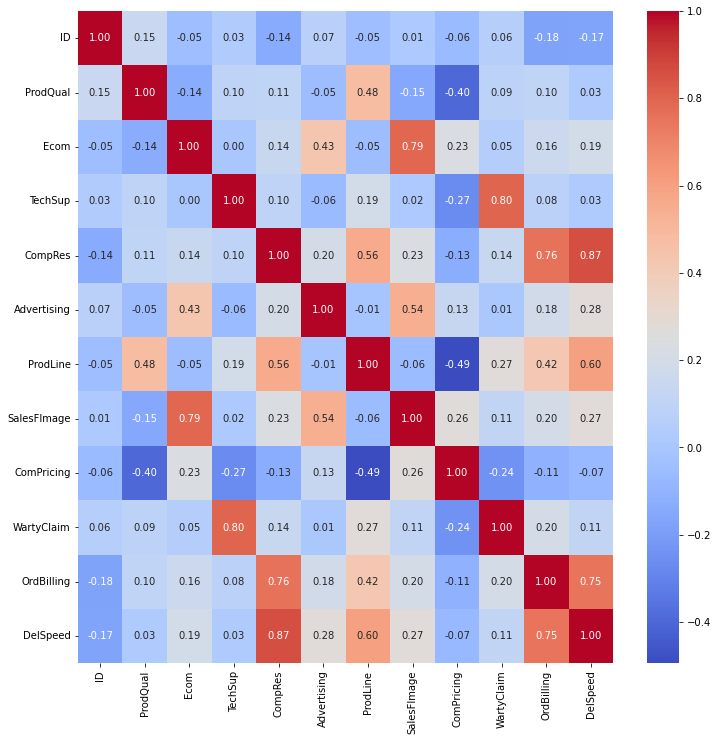

In [31]:
plt.figure(figsize=(12,12))
sns.heatmap(df_1, annot=True, fmt = '.2f', cmap='coolwarm')


## 2. Scale the variables and write the inference for using the type of scaling function for this case study.

In [32]:
df_1 = df.drop(['ID'], axis =1)

In [33]:
df_1

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
0,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7
1,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9
2,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5
3,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0
4,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5
...,...,...,...,...,...,...,...,...,...,...,...
95,8.6,4.8,5.6,5.3,2.3,6.0,5.7,6.7,5.8,4.9,3.6
96,7.4,3.4,2.6,5.0,4.1,4.4,4.8,7.2,4.5,4.2,3.7
97,8.7,3.2,3.3,3.2,3.1,6.1,2.9,5.6,5.0,3.1,2.5
98,7.8,4.9,5.8,5.3,5.2,5.3,7.1,7.9,6.0,4.3,3.9


In [34]:
from scipy.stats import zscore
df_z=df_1.apply(zscore)
df_z.head()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
0,0.496660,0.327114,-1.881421,0.380922,0.704543,-0.691530,0.821973,-0.113185,-1.646582,0.781230,-0.254531
1,0.280721,-1.394538,-0.174023,1.462141,-0.544014,1.600835,-1.896068,-1.088915,-0.665744,-0.409009,1.387605
2,1.000518,-0.390241,0.154322,0.131410,1.239639,1.218774,0.634522,-1.609304,0.192489,1.214044,0.840226
3,-1.014914,-0.533712,1.073690,-1.448834,0.615361,-0.844354,-0.583910,1.187789,1.173327,0.023805,-1.212443
4,0.856559,-0.390241,-0.108354,-0.700298,-1.614207,0.149004,-0.583910,-0.113185,0.069885,0.240212,-0.528220


## 3. Comment on the comparison between covariance and the correlation matrix after scaling.

In [35]:
cov_matrix = np.cov(df_z.T)
print(cov_matrix)

[[ 1.01010101e+00 -1.38548704e-01  9.65661154e-02  1.07444445e-01
  -5.40132667e-02  4.82316579e-01 -1.53346338e-01 -4.05335236e-01
   8.92043497e-02  1.05356640e-01  2.79979825e-02]
 [-1.38548704e-01  1.01010101e+00  8.75544162e-04  1.41595213e-01
   4.34233041e-01 -5.32200387e-02  7.99539102e-01  2.31780203e-01
   5.24224157e-02  1.57724577e-01  1.93571786e-01]
 [ 9.65661154e-02  8.75544162e-04  1.01010101e+00  9.76329270e-02
  -6.35051180e-02  1.94571168e-01  1.71621612e-02 -2.73521901e-01
   8.05220127e-01  8.09109340e-02  2.56976702e-02]
 [ 1.07444445e-01  1.41595213e-01  9.76329270e-02  1.01010101e+00
   1.98905906e-01  5.67087831e-01  2.32072486e-01 -1.29246720e-01
   1.41826562e-01  7.64513729e-01  8.73829997e-01]
 [-5.40132667e-02  4.34233041e-01 -6.35051180e-02  1.98905906e-01
   1.01010101e+00 -1.16674936e-02  5.47680463e-01  1.35572620e-01
   1.09010852e-02  1.86096560e-01  2.78649579e-01]
 [ 4.82316579e-01 -5.32200387e-02  1.94571168e-01  5.67087831e-01
  -1.16674936e-02  

In [36]:
df_z1 = df_z.corr()
df_z1

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
ProdQual,1.000000,-0.137163,0.095600,0.106370,-0.053473,0.477493,-0.151813,-0.401282,0.088312,0.104303,0.027718
Ecom,-0.137163,1.000000,0.000867,0.140179,0.429891,-0.052688,0.791544,0.229462,0.051898,0.156147,0.191636
TechSup,0.095600,0.000867,1.000000,0.096657,-0.062870,0.192625,0.016991,-0.270787,0.797168,0.080102,0.025441
CompRes,0.106370,0.140179,0.096657,1.000000,0.196917,0.561417,0.229752,-0.127954,0.140408,0.756869,0.865092
Advertising,-0.053473,0.429891,-0.062870,0.196917,1.000000,-0.011551,0.542204,0.134217,0.010792,0.184236,0.275863
ProdLine,0.477493,-0.052688,0.192625,0.561417,-0.011551,1.000000,-0.061316,-0.494948,0.273078,0.424408,0.601850
SalesFImage,-0.151813,0.791544,0.016991,0.229752,0.542204,-0.061316,1.000000,0.264597,0.107455,0.195127,0.271551
ComPricing,-0.401282,0.229462,-0.270787,-0.127954,0.134217,-0.494948,0.264597,1.000000,-0.244986,-0.114567,-0.072872
WartyClaim,0.088312,0.051898,0.797168,0.140408,0.010792,0.273078,0.107455,-0.244986,1.000000,0.197065,0.109395
OrdBilling,0.104303,0.156147,0.080102,0.756869,0.184236,0.424408,0.195127,-0.114567,0.197065,1.000000,0.751003


<AxesSubplot:>

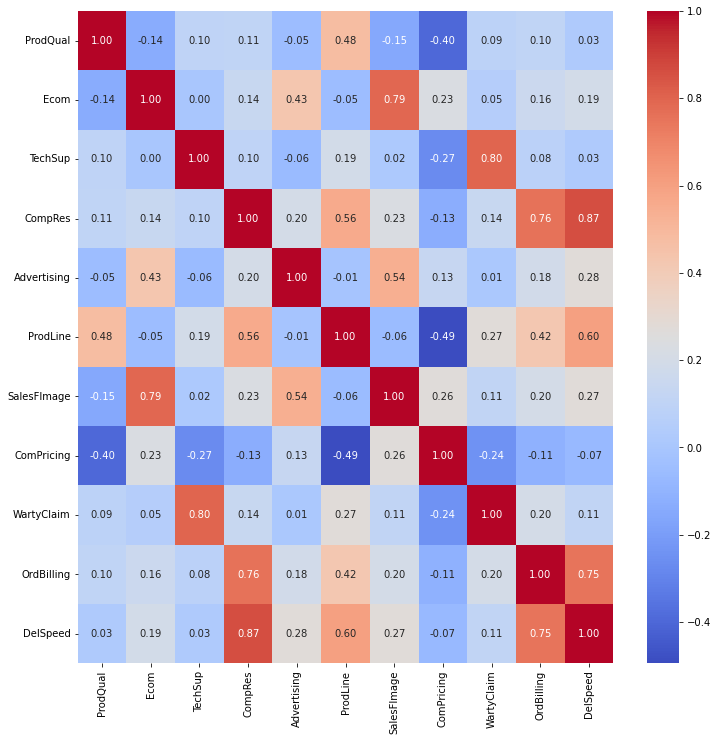

In [37]:
plt.figure(figsize=(12,12))
sns.heatmap(df_z1, annot=True, fmt = '.2f', cmap='coolwarm')

## 4. Check the dataset for outliers before and after scaling. Draw your inferences from this exercise.

<AxesSubplot:>

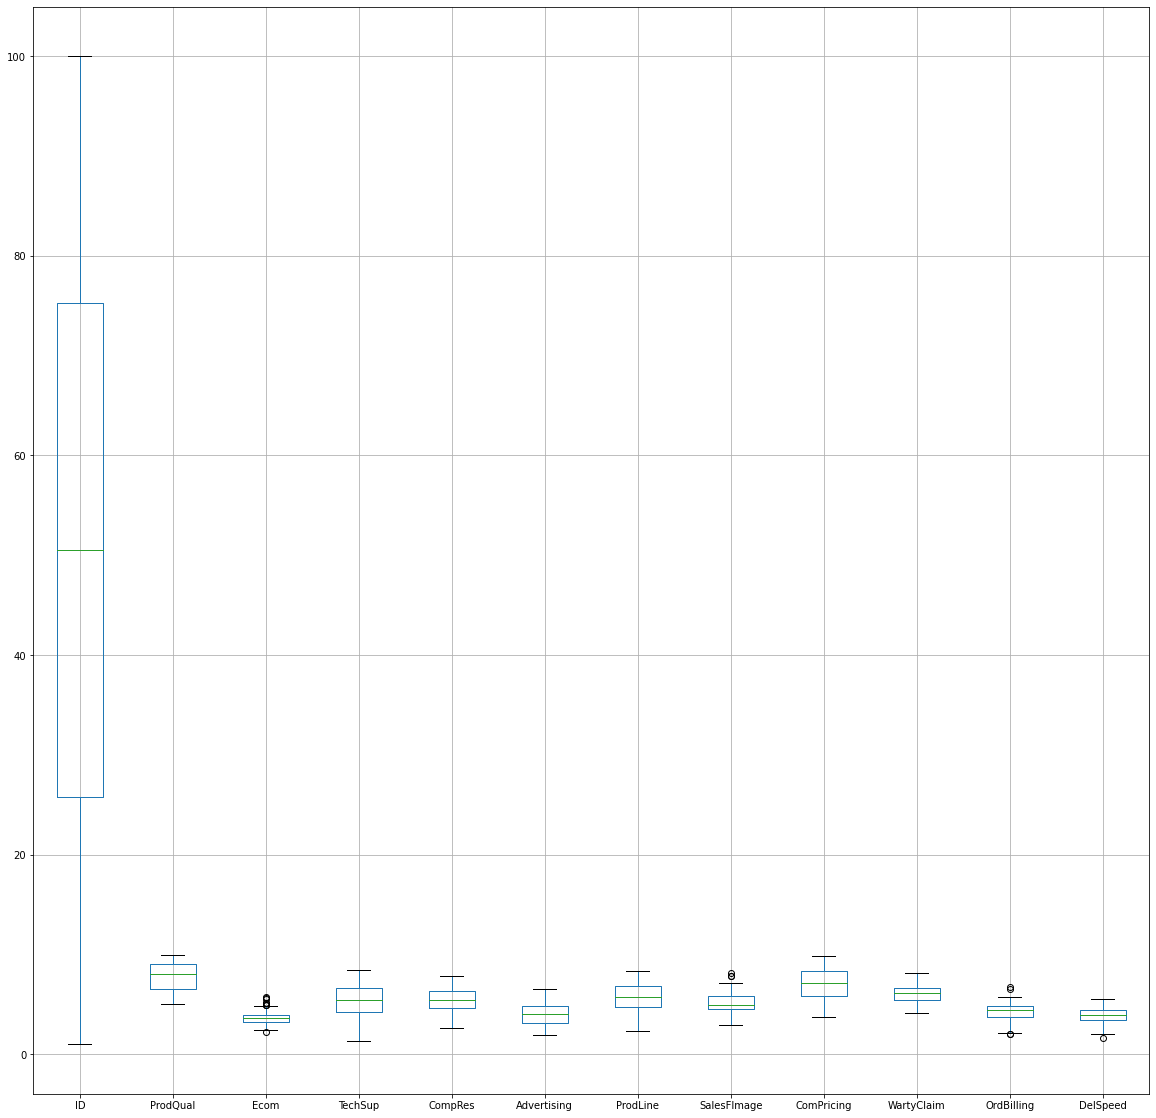

In [38]:
df.boxplot(figsize=(20,20))

<AxesSubplot:>

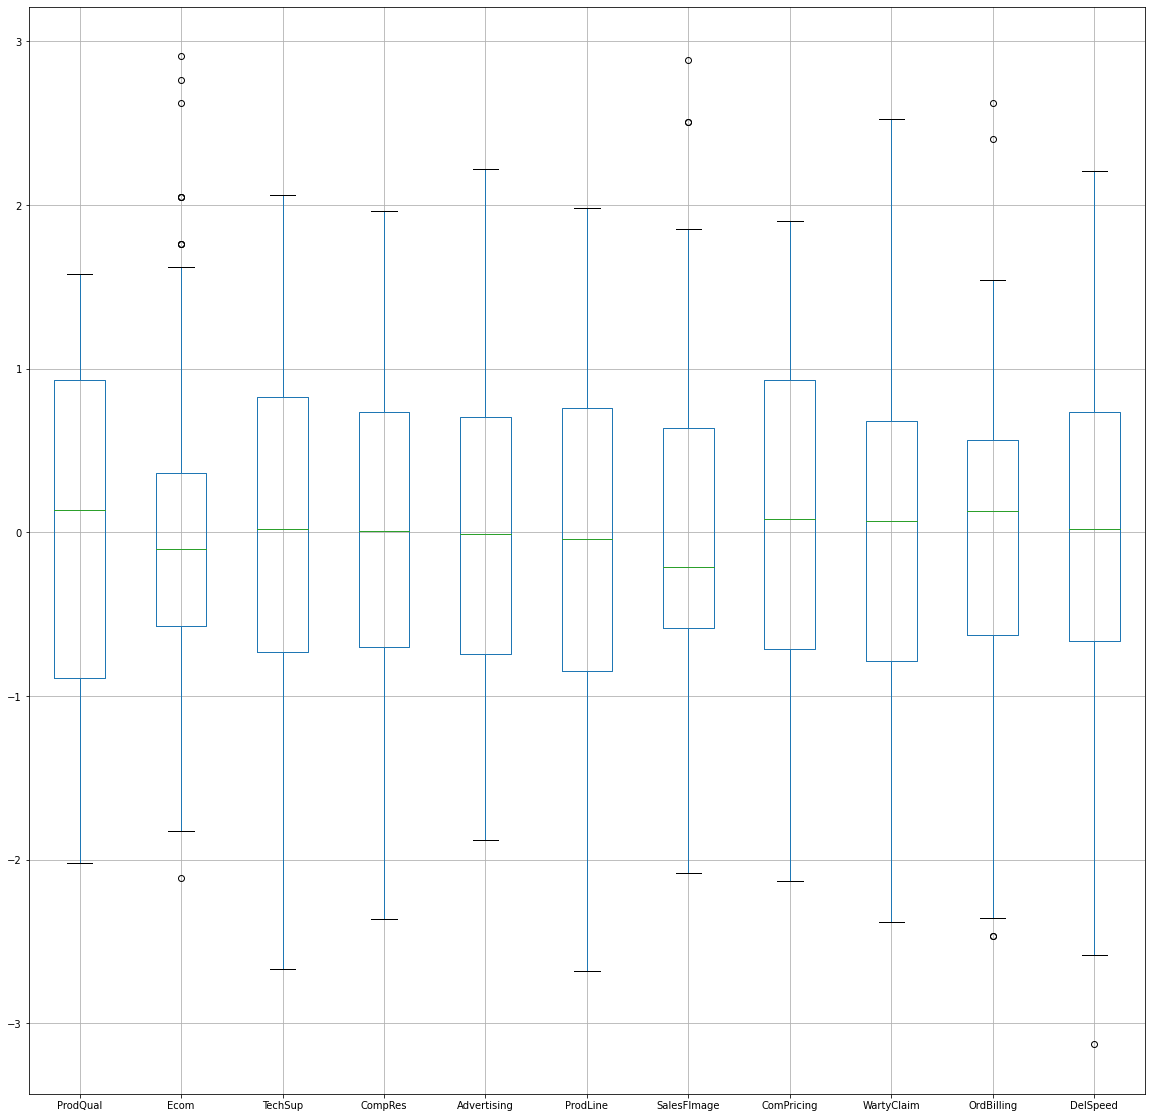

In [39]:
df_z.boxplot(figsize=(20,20))

## 5. Build the covariance matrix, eigenvalues and eigenvector.

In [40]:
from scipy.stats import zscore
df_z=df_1.apply(zscore)
df_z

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
0,0.496660,0.327114,-1.881421,0.380922,0.704543,-0.691530,0.821973,-0.113185,-1.646582,0.781230,-0.254531
1,0.280721,-1.394538,-0.174023,1.462141,-0.544014,1.600835,-1.896068,-1.088915,-0.665744,-0.409009,1.387605
2,1.000518,-0.390241,0.154322,0.131410,1.239639,1.218774,0.634522,-1.609304,0.192489,1.214044,0.840226
3,-1.014914,-0.533712,1.073690,-1.448834,0.615361,-0.844354,-0.583910,1.187789,1.173327,0.023805,-1.212443
4,0.856559,-0.390241,-0.108354,-0.700298,-1.614207,0.149004,-0.583910,-0.113185,0.069885,0.240212,-0.528220
...,...,...,...,...,...,...,...,...,...,...,...
95,0.568640,1.618353,0.154322,-0.118102,-1.525024,0.149004,0.540797,-0.178233,-0.297929,0.673026,-0.391376
96,-0.295117,-0.390241,-1.815752,-0.367615,0.080264,-1.073591,-0.302734,0.147010,-1.891791,-0.084399,-0.254531
97,0.640619,-0.677183,-1.356068,-1.864688,-0.811562,0.225416,-2.083519,-0.893769,-1.278767,-1.274638,-1.896667
98,-0.007198,1.761824,0.285661,-0.118102,1.061274,-0.385881,1.852955,0.602351,-0.052720,0.023805,0.019158


In [41]:
cov_matrix = np.cov(df_z.T)
print(cov_matrix)


[[ 1.01010101e+00 -1.38548704e-01  9.65661154e-02  1.07444445e-01
  -5.40132667e-02  4.82316579e-01 -1.53346338e-01 -4.05335236e-01
   8.92043497e-02  1.05356640e-01  2.79979825e-02]
 [-1.38548704e-01  1.01010101e+00  8.75544162e-04  1.41595213e-01
   4.34233041e-01 -5.32200387e-02  7.99539102e-01  2.31780203e-01
   5.24224157e-02  1.57724577e-01  1.93571786e-01]
 [ 9.65661154e-02  8.75544162e-04  1.01010101e+00  9.76329270e-02
  -6.35051180e-02  1.94571168e-01  1.71621612e-02 -2.73521901e-01
   8.05220127e-01  8.09109340e-02  2.56976702e-02]
 [ 1.07444445e-01  1.41595213e-01  9.76329270e-02  1.01010101e+00
   1.98905906e-01  5.67087831e-01  2.32072486e-01 -1.29246720e-01
   1.41826562e-01  7.64513729e-01  8.73829997e-01]
 [-5.40132667e-02  4.34233041e-01 -6.35051180e-02  1.98905906e-01
   1.01010101e+00 -1.16674936e-02  5.47680463e-01  1.35572620e-01
   1.09010852e-02  1.86096560e-01  2.78649579e-01]
 [ 4.82316579e-01 -5.32200387e-02  1.94571168e-01  5.67087831e-01
  -1.16674936e-02  

In [42]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors' , eig_vecs)
print('\n Eigen Values', eig_vals)

Eigen Vectors [[ 0.13378962 -0.31349802  0.06227164  0.6431362  -0.2316662  -0.56456996
   0.19164132  0.18279209  0.06659717 -0.13547311  0.0313281 ]
 [ 0.16595278  0.44650918 -0.23524791  0.27238033 -0.42228844  0.26325703
   0.05962621  0.06233863  0.28155772  0.12202642 -0.54251104]
 [ 0.15769263 -0.23096734 -0.61095105 -0.19339314  0.02395667 -0.10876896
  -0.01719992 -0.05192956 -0.3881709  -0.46470964 -0.35929961]
 [ 0.47068359  0.01944394  0.21035078 -0.20632037 -0.02865743 -0.02815231
  -0.0084996  -0.36253352  0.53467243 -0.51339754  0.09324751]
 [ 0.18373495  0.36366471 -0.08809705  0.31789448  0.80387024 -0.20056937
  -0.06306962 -0.08118684  0.03715799  0.05347713 -0.15468169]
 [ 0.38676517 -0.28478056  0.11627864  0.20290226 -0.11667416  0.09819533
  -0.60814755 -0.38507778 -0.23479794  0.3332071  -0.08415534]
 [ 0.2036696   0.47069599 -0.2413421   0.22217722 -0.20437283  0.10497225
   0.00143735 -0.08469869 -0.35341191 -0.16910665  0.64489911]
 [-0.15168864  0.4134565   

## 6. Write the explicit form of the first PC (in terms of Eigen Vectors).

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca = PCA(n_components=11)
X_pca= pca.fit_transform(df_z)

In [44]:
pca.components_

array([[-0.13378962, -0.16595278, -0.15769263, -0.47068359, -0.18373495,
        -0.38676517, -0.2036696 ,  0.15168864, -0.21293363, -0.43721774,
        -0.47308914],
       [-0.31349802,  0.44650918, -0.23096734,  0.01944394,  0.36366471,
        -0.28478056,  0.47069599,  0.4134565 , -0.19167191,  0.02639905,
         0.07305172],
       [ 0.06227164, -0.23524791, -0.61095105,  0.21035078, -0.08809705,
         0.11627864, -0.2413421 ,  0.05304529, -0.59856398,  0.16892981,
         0.23262477],
       [ 0.6431362 ,  0.27238033, -0.19339314, -0.20632037,  0.31789448,
         0.20290226,  0.22217722, -0.33354348, -0.18530205, -0.23685365,
        -0.1973299 ],
       [ 0.2316662 ,  0.42228844, -0.02395667,  0.02865743, -0.80387024,
         0.11667416,  0.20437283,  0.24892601, -0.03292706,  0.02675377,
        -0.03543294],
       [-0.56456996,  0.26325703, -0.10876896, -0.02815231, -0.20056937,
         0.09819533,  0.10497225, -0.70973595, -0.13983966, -0.11947974,
         0.029

In [45]:
df_z.columns

Index(['ProdQual', 'Ecom', 'TechSup', 'CompRes', 'Advertising', 'ProdLine',
       'SalesFImage', 'ComPricing', 'WartyClaim', 'OrdBilling', 'DelSpeed'],
      dtype='object')

In [46]:
print('The explicit form of the first PC: ')
for i in range(0,df_z.shape[1]):
    print('{} * {}'.format(np.round(pca.components_[0][i],2),df_z.columns[i]),end=' + ')


The explicit form of the first PC: 
-0.13 * ProdQual + -0.17 * Ecom + -0.16 * TechSup + -0.47 * CompRes + -0.18 * Advertising + -0.39 * ProdLine + -0.2 * SalesFImage + 0.15 * ComPricing + -0.21 * WartyClaim + -0.44 * OrdBilling + -0.47 * DelSpeed + 

## 7.  Discuss the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate? Perform PCA and export the data of the Principal Component scores into a data frame.

In [47]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 31.1542848 ,  54.34425491,  69.71676832,  79.59455066,
        85.1347697 ,  90.15189496,  93.80205993,  96.04707397,
        97.89755822,  99.10520892, 100.        ])

In [48]:
pca = PCA(n_components=5)
X_pca= pca.fit_transform(df_z)


In [49]:
pca.components_

array([[-0.13378962, -0.16595278, -0.15769263, -0.47068359, -0.18373495,
        -0.38676517, -0.2036696 ,  0.15168864, -0.21293363, -0.43721774,
        -0.47308914],
       [-0.31349802,  0.44650918, -0.23096734,  0.01944394,  0.36366471,
        -0.28478056,  0.47069599,  0.4134565 , -0.19167191,  0.02639905,
         0.07305172],
       [ 0.06227164, -0.23524791, -0.61095105,  0.21035078, -0.08809705,
         0.11627864, -0.2413421 ,  0.05304529, -0.59856398,  0.16892981,
         0.23262477],
       [ 0.6431362 ,  0.27238033, -0.19339314, -0.20632037,  0.31789448,
         0.20290226,  0.22217722, -0.33354348, -0.18530205, -0.23685365,
        -0.1973299 ],
       [ 0.2316662 ,  0.42228844, -0.02395667,  0.02865743, -0.80387024,
         0.11667416,  0.20437283,  0.24892601, -0.03292706,  0.02675377,
        -0.03543294]])

# 2. The State_wise_Health_income.csv dataset given is about the Health and economic conditions in different States of a country. The Group States based on how similar their situation is, to provide these groups to the government so that appropriate measures can be taken to escalate their Health and Economic conditions.

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.cluster.hierarchy as sch
from  scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from  sklearn.cluster import AgglomerativeClustering
from  sklearn.cluster import KMeans
from  sklearn.metrics import silhouette_score


In [106]:
data=pd.read_csv('State_wise_Health_income.csv')

In [107]:
data

,Unnamed: 0,States,Health_indeces1,Health_indices2,Per_capita_income,GDP
0,0,Bachevo,417,66,564,1823
1,1,Balgarchevo,1485,646,2710,73662
2,2,Belasitsa,654,299,1104,27318
3,3,Belo_Pole,192,25,573,250
4,4,Beslen,43,8,528,22
...,...,...,...,...,...,...
292,292,Greencastle,3443,970,2499,238636
293,293,Greenisland,2963,793,1257,162831
294,294,Greyabbey,3276,609,1522,120184
295,295,Greysteel,3463,847,934,199403


In [108]:
data.head()

,Unnamed: 0,States,Health_indeces1,Health_indices2,Per_capita_income,GDP
0,0,Bachevo,417,66,564,1823
1,1,Balgarchevo,1485,646,2710,73662
2,2,Belasitsa,654,299,1104,27318
3,3,Belo_Pole,192,25,573,250
4,4,Beslen,43,8,528,22


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         297 non-null    int64 
 1   States             297 non-null    object
 2   Health_indeces1    297 non-null    int64 
 3   Health_indices2    297 non-null    int64 
 4   Per_capita_income  297 non-null    int64 
 5   GDP                297 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 14.0+ KB


In [110]:
data.dtypes.value_counts()

int64     5
object    1
dtype: int64

In [111]:
data.isnull().sum()

Unnamed: 0           0
States               0
Health_indeces1      0
Health_indices2      0
Per_capita_income    0
GDP                  0
dtype: int64

In [112]:
data.shape

(297, 6)

In [113]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,297.0,148.000000,85.880731,0.0,74.0,148.0,222.0,296.0
Health_indeces1,297.0,2630.151515,2038.505431,-10.0,641.0,2451.0,4094.0,10219.0
Health_indices2,297.0,693.632997,468.944354,0.0,175.0,810.0,1073.0,1508.0
Per_capita_income,297.0,2156.915825,1491.854058,500.0,751.0,1865.0,3137.0,7049.0
GDP,297.0,174601.117845,167167.992863,22.0,8721.0,137173.0,313092.0,728575.0


## 1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, etc)

In [114]:
data.head()

,Unnamed: 0,States,Health_indeces1,Health_indices2,Per_capita_income,GDP
0,0,Bachevo,417,66,564,1823
1,1,Balgarchevo,1485,646,2710,73662
2,2,Belasitsa,654,299,1104,27318
3,3,Belo_Pole,192,25,573,250
4,4,Beslen,43,8,528,22


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         297 non-null    int64 
 1   States             297 non-null    object
 2   Health_indeces1    297 non-null    int64 
 3   Health_indices2    297 non-null    int64 
 4   Per_capita_income  297 non-null    int64 
 5   GDP                297 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 14.0+ KB


In [116]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,297.0,148.000000,85.880731,0.0,74.0,148.0,222.0,296.0
Health_indeces1,297.0,2630.151515,2038.505431,-10.0,641.0,2451.0,4094.0,10219.0
Health_indices2,297.0,693.632997,468.944354,0.0,175.0,810.0,1073.0,1508.0
Per_capita_income,297.0,2156.915825,1491.854058,500.0,751.0,1865.0,3137.0,7049.0
GDP,297.0,174601.117845,167167.992863,22.0,8721.0,137173.0,313092.0,728575.0


In [117]:
data.dtypes

Unnamed: 0            int64
States               object
Health_indeces1       int64
Health_indices2       int64
Per_capita_income     int64
GDP                   int64
dtype: object

In [118]:
data.isnull().sum()

Unnamed: 0           0
States               0
Health_indeces1      0
Health_indices2      0
Per_capita_income    0
GDP                  0
dtype: int64

In [119]:
data.nunique()

Unnamed: 0           297
States               296
Health_indeces1      278
Health_indices2      249
Per_capita_income    279
GDP                  286
dtype: int64

In [120]:
dups=data.duplicated().sum()
print("Number of duplicate rows = %d" % (dups.sum()))

Number of duplicate rows = 0


In [121]:
data.shape

(297, 6)

## Univariate Analysis

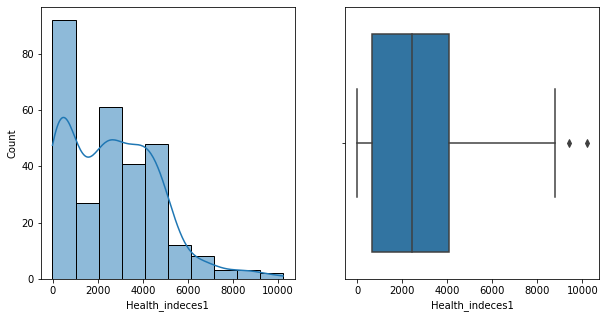

In [122]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.histplot(data.Health_indeces1, kde=True, ax=axs[0])
sns.boxplot(x='Health_indeces1', data=data, ax=axs[1])
plt.show()

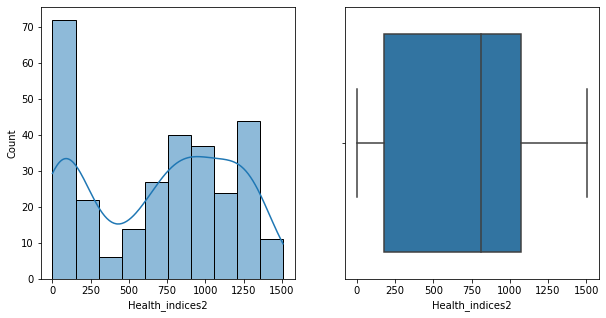

In [123]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.histplot(data.Health_indices2, kde=True, ax=axs[0])
sns.boxplot(x='Health_indices2', data=data, ax=axs[1])
plt.show()

ValueError: Could not interpret input 'Per_capita_income '

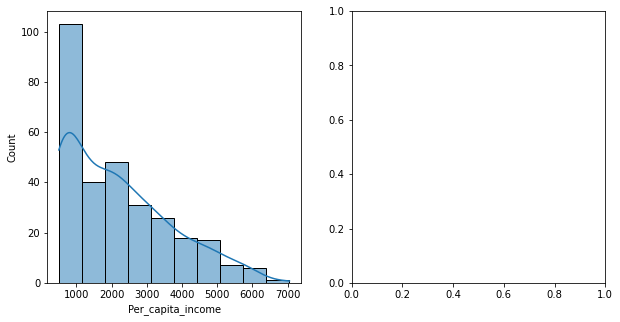

In [124]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.histplot(data.Per_capita_income , kde=True, ax=axs[0])
sns.boxplot(x='Per_capita_income ', data=data, ax=axs[1])
plt.show()

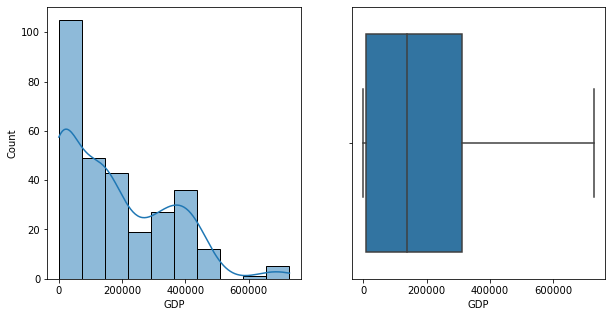

In [125]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.histplot(data.GDP  , kde=True, ax=axs[0])
sns.boxplot(x='GDP', data=data, ax=axs[1])
plt.show()

## Multivariate Analysis

<Figure size 864x864 with 0 Axes>

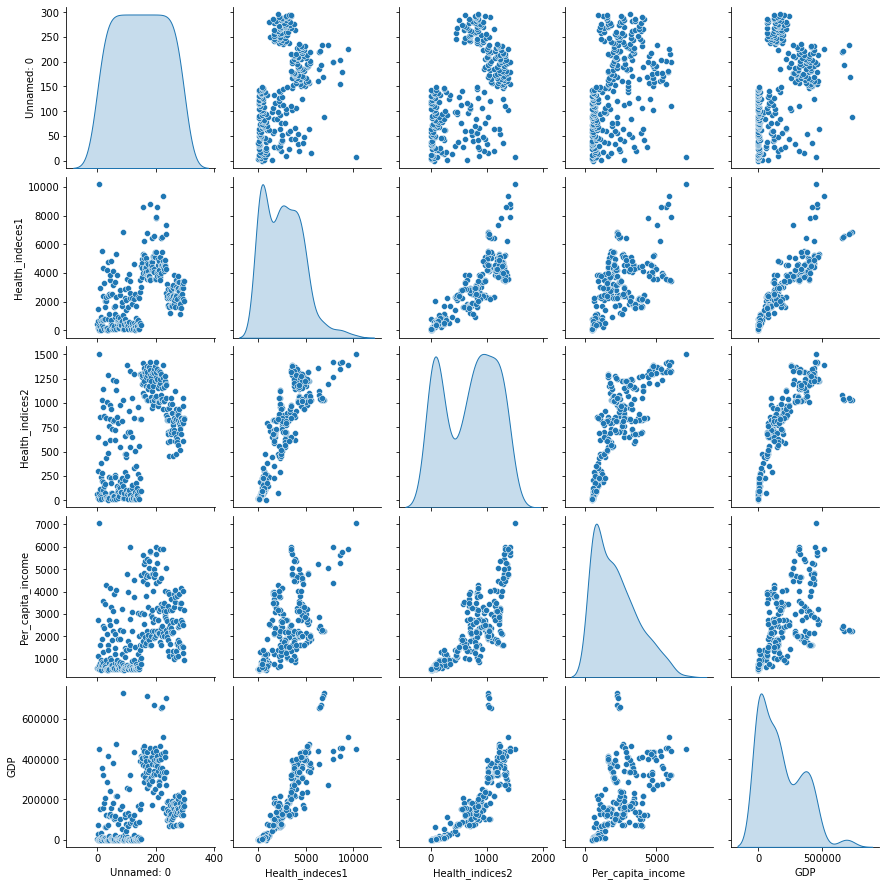

In [193]:
plt.figure(figsize=(12,12))
sns.pairplot(data, diag_kind='kde')
plt.show()

In [126]:
data_1 = data.corr()
data_1

,Unnamed: 0,Health_indeces1,Health_indices2,Per_capita_income,GDP
Unnamed: 0,1.000000,0.407343,0.504335,0.398628,0.387966
Health_indeces1,0.407343,1.000000,0.866403,0.668632,0.906999
Health_indices2,0.504335,0.866403,1.000000,0.811553,0.869385
Per_capita_income,0.398628,0.668632,0.811553,1.000000,0.629395
GDP,0.387966,0.906999,0.869385,0.629395,1.000000


<AxesSubplot:>

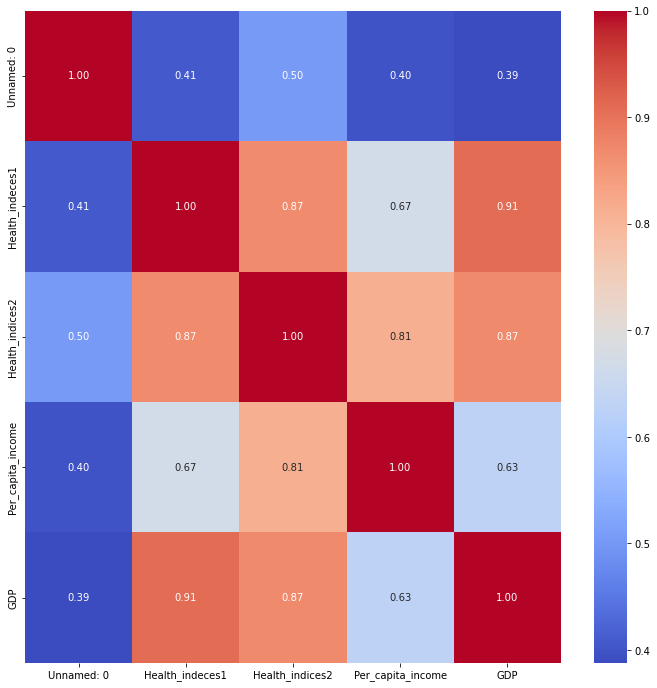

In [127]:
plt.figure(figsize=(12,12))
sns.heatmap(data_1, annot=True, fmt = '.2f', cmap='coolwarm')

## Checking for outliers

<AxesSubplot:>

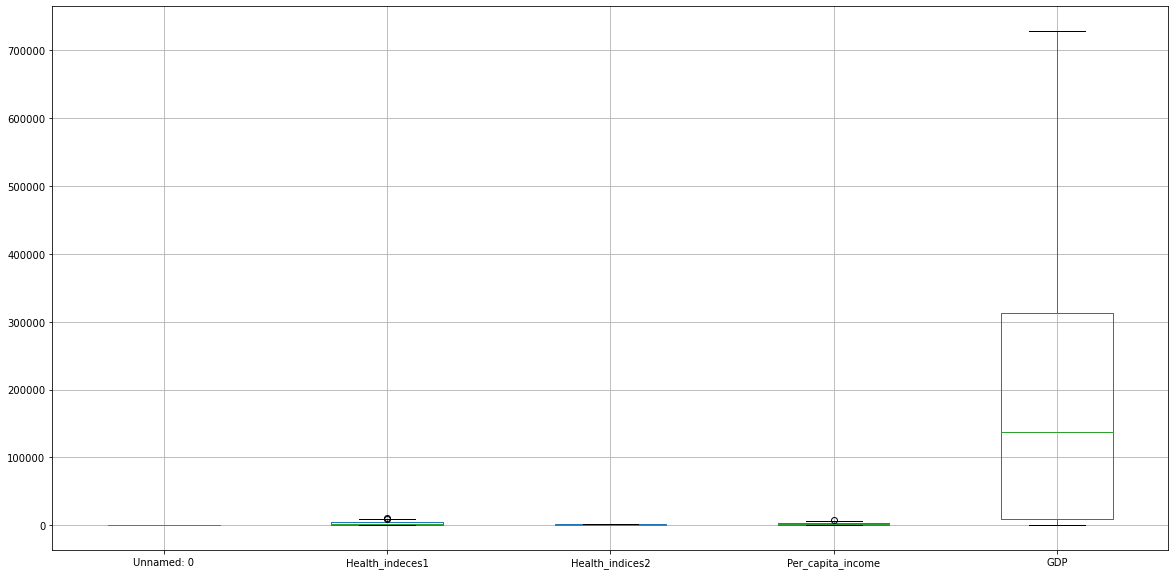

In [128]:
data.boxplot(figsize=(20,10))

## Treating outliers

In [129]:
data_copy=data.copy()

In [130]:
def remove_outlier(data_copy, Health_indeces1):
    q1 = data_copy[Health_indeces1].quantile(0.25)
    q3 = data_copy[Health_indeces1].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return data_copy[(data_copy[Health_indeces1] >= lower_bound) & (data_copy[Health_indeces1] <= upper_bound)]
df_cleaned = remove_outlier(data_copy, 'Health_indeces1')


<AxesSubplot:>

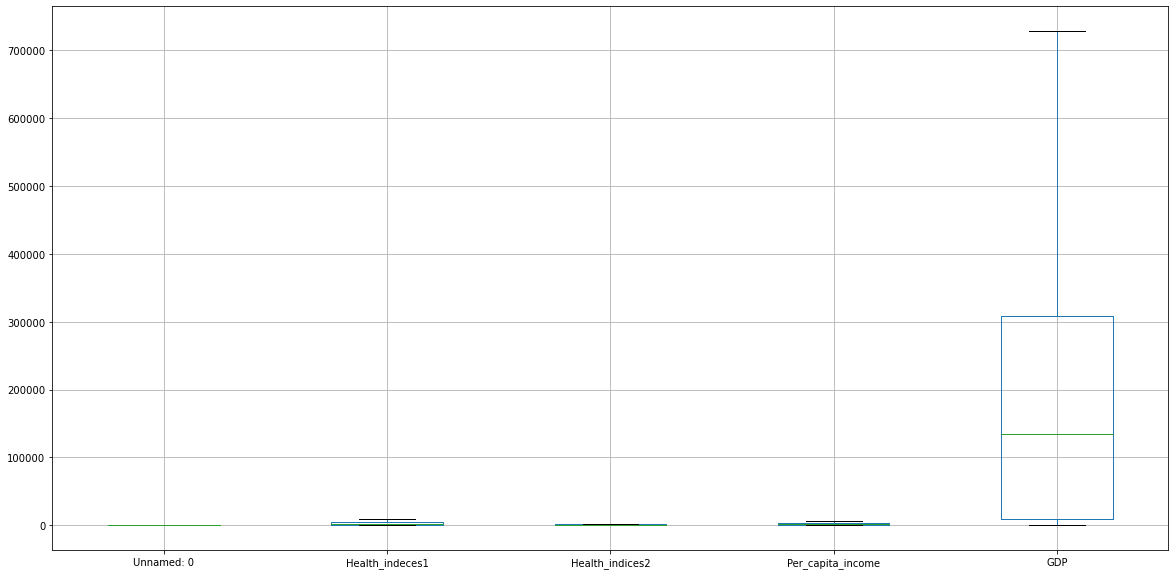

In [131]:
df_cleaned.boxplot(figsize=(20,10))

<AxesSubplot:>

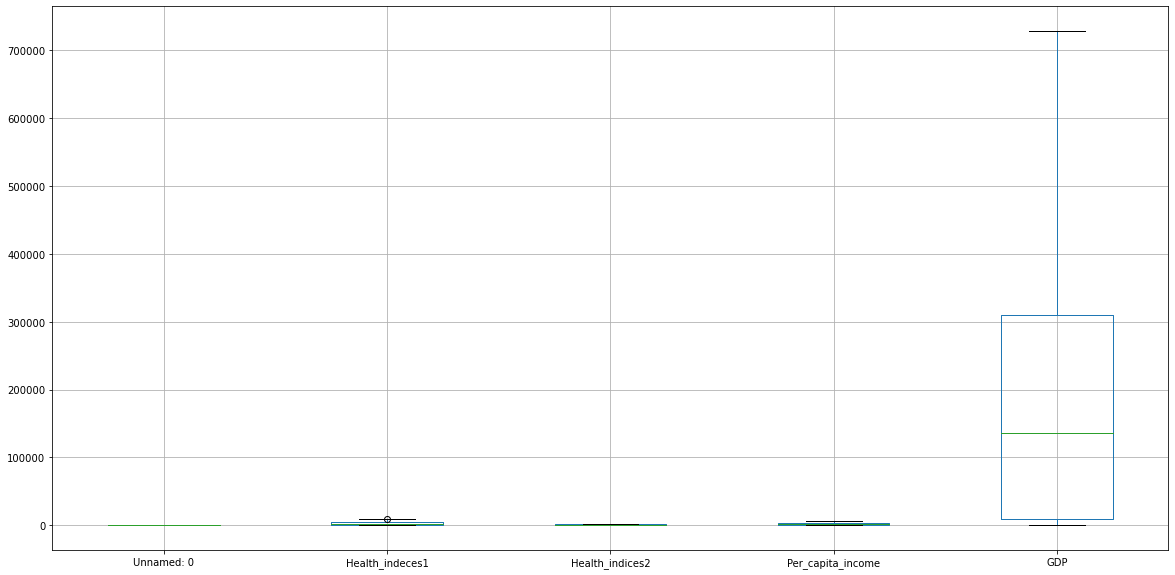

In [133]:
\]\\\

## 2 Do you think scaling is necessary for clustering in this case? Justify

In [134]:
data_copy.drop('States', axis=1, inplace=True)

In [135]:
data_copy

,Unnamed: 0,Health_indeces1,Health_indices2,Per_capita_income,GDP
0,0,417,66,564,1823
1,1,1485,646,2710,73662
2,2,654,299,1104,27318
3,3,192,25,573,250
4,4,43,8,528,22
...,...,...,...,...,...
292,292,3443,970,2499,238636
293,293,2963,793,1257,162831
294,294,3276,609,1522,120184
295,295,3463,847,934,199403


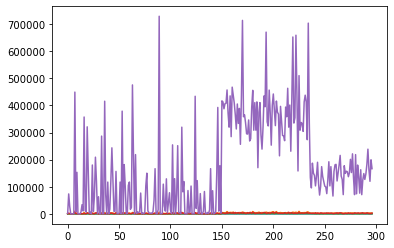

In [136]:
plt.plot(data_copy)
plt.show()

In [137]:
from scipy.stats import zscore
data_copy_scaled=data_copy.apply(zscore)
round(data_copy_scaled.head(),3)

,Unnamed: 0,Health_indeces1,Health_indices2,Per_capita_income,GDP
0,-1.726,-1.088,-1.341,-1.070,-1.035
1,-1.715,-0.563,-0.102,0.371,-0.605
2,-1.703,-0.971,-0.843,-0.707,-0.883
3,-1.691,-1.198,-1.428,-1.064,-1.045
4,-1.680,-1.271,-1.465,-1.094,-1.046


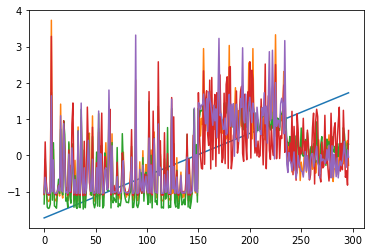

In [138]:
plt.plot(data_copy_scaled)
plt.show()

 ## 3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them.

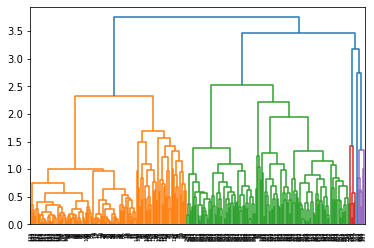

In [139]:
link_method = linkage(data_copy_scaled, method = 'average')
dend = dendrogram(link_method)

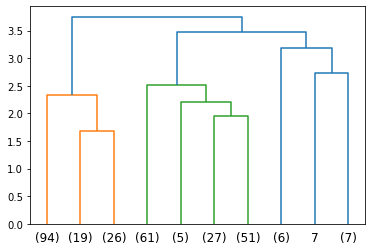

In [140]:
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 10)

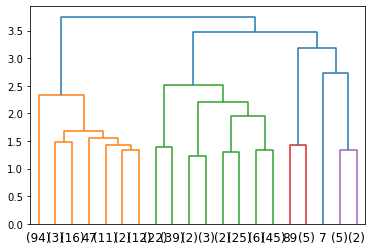

In [141]:
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 20)

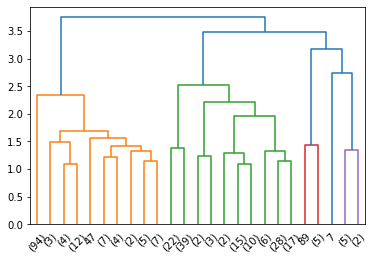

In [142]:
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 25)

In [143]:
clusters_3 = fcluster(link_method, 3, criterion='maxclust')
clusters_3

array([1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int3

In [144]:
cluster3_dataset=data.copy()

In [145]:
cluster3_dataset['clusters-3'] = clusters_3

In [146]:
cluster3_dataset.head(25)

,Unnamed: 0,States,Health_indeces1,Health_indices2,Per_capita_income,GDP,clusters-3
0,0,Bachevo,417,66,564,1823,1
1,1,Balgarchevo,1485,646,2710,73662,1
2,2,Belasitsa,654,299,1104,27318,1
3,3,Belo_Pole,192,25,573,250,1
4,4,Beslen,43,8,528,22,1
5,5,Bogolin,69,14,527,73,1
6,6,Bogoroditsa,307,69,707,1724,1
7,7,Buchino,10219,1508,7049,449003,3
8,8,Budiltsi,744,115,809,7497,1
9,9,Cherniche,2975,857,1600,153299,1


In [147]:
cluster3_dataset['clusters-3'].value_counts().sort_index()

1    139
2    144
3     14
Name: clusters-3, dtype: int64

In [148]:
aggdata=cluster3_dataset.groupby('clusters-3').mean()
aggdata['Freq']=cluster3_dataset['clusters-3'].value_counts().sort_index()
aggdata

,Unnamed: 0,Health_indeces1,Health_indices2,Per_capita_income,GDP,Freq
clusters-3,,,,,,
1,74.884892,1077.697842,298.158273,1170.741007,45183.920863,139
2,215.402778,3630.166667,1023.145833,2909.652778,264215.500000,144
3,180.642857,7757.928571,1230.857143,4205.785714,537781.071429,14


In [149]:
#Another method - ward
wardlink = linkage(data_copy_scaled, method='ward')

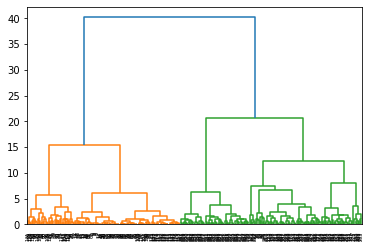

In [150]:
dend_wardlink = dendrogram(wardlink)

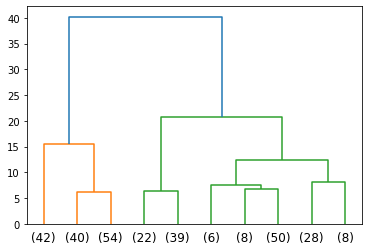

In [151]:
dend_wardlink = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [152]:
clusters_wdlk_3 = fcluster(wardlink, 3, criterion='maxclust')
clusters_wdlk_3

array([1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int3

In [153]:
cluster_w_3_dataset=data.copy()

In [154]:
cluster_w_3_dataset['clusters-3'] = clusters_wdlk_3

In [155]:
cluster_w_3_dataset.head(25)

,Unnamed: 0,States,Health_indeces1,Health_indices2,Per_capita_income,GDP,clusters-3
0,0,Bachevo,417,66,564,1823,1
1,1,Balgarchevo,1485,646,2710,73662,1
2,2,Belasitsa,654,299,1104,27318,1
3,3,Belo_Pole,192,25,573,250,1
4,4,Beslen,43,8,528,22,1
5,5,Bogolin,69,14,527,73,1
6,6,Bogoroditsa,307,69,707,1724,1
7,7,Buchino,10219,1508,7049,449003,3
8,8,Budiltsi,744,115,809,7497,1
9,9,Cherniche,2975,857,1600,153299,1


In [156]:
cluster_w_3_dataset['clusters-3'].value_counts().sort_index()

1    136
2     61
3    100
Name: clusters-3, dtype: int64

In [157]:
aggdata_w=cluster_w_3_dataset.groupby('clusters-3').mean()
aggdata_w['Freq']=cluster_w_3_dataset['clusters-3'].value_counts().sort_index()
aggdata_w

,Unnamed: 0,Health_indeces1,Health_indices2,Per_capita_income,GDP,Freq
clusters-3,,,,,,
1,75.632353,1009.198529,283.25000,1138.544118,41128.617647,136
2,266.000000,2508.114754,779.47541,2444.934426,142350.475410,61
3,174.440000,4909.090000,1199.39000,3366.210000,375796.610000,100


## 4 Clustering: Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and find the silhouette score.

In [158]:
k_means = KMeans(n_clusters = 1)
k_means.fit(data_copy_scaled)
k_means.inertia_

1485.0

In [159]:
k_means = KMeans(n_clusters = 2)
k_means.fit(data_copy_scaled)
k_means.inertia_

649.4123850669371

In [160]:
k_means = KMeans(n_clusters = 3)
k_means.fit(data_copy_scaled)
k_means.inertia_

437.84265902103175

In [161]:
k_means = KMeans(n_clusters = 4)
k_means.fit(data_copy_scaled)
k_means.inertia_

328.63050767908925

In [162]:
wss =[]

In [163]:
for i in range(1,11): 
    KM= KMeans(n_clusters=i) 
    KM.fit(data_copy_scaled)
    wss.append(KM.inertia_)

In [164]:
wss

[1485.0,
 649.4123850669371,
 437.84265902103175,
 328.63050767908925,
 252.3656831238768,
 219.80186365414767,
 196.1494380472409,
 172.27183039412375,
 152.91932525232875,
 135.8617299649618]

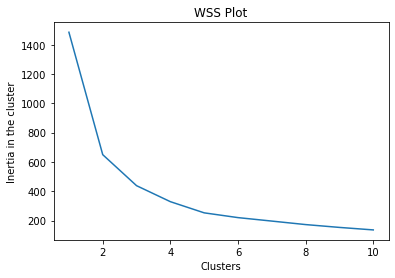

In [165]:
plt.plot(range(1,11), wss)
plt.xlabel("Clusters")
plt.ylabel("Inertia in the cluster")
plt.title("WSS Plot")
plt.show()

In [166]:
k_means_4 = KMeans(n_clusters = 4)
k_means_4.fit(data_copy_scaled)
labels_4 = k_means_4.labels_

In [167]:
kmeans4_dataset=data.copy()

In [168]:
kmeans4_dataset["Clus_kmeans"] = labels_4
kmeans4_dataset.head(5)

,Unnamed: 0,States,Health_indeces1,Health_indices2,Per_capita_income,GDP,Clus_kmeans
0,0,Bachevo,417,66,564,1823,1
1,1,Balgarchevo,1485,646,2710,73662,2
2,2,Belasitsa,654,299,1104,27318,1
3,3,Belo_Pole,192,25,573,250,1
4,4,Beslen,43,8,528,22,1


In [169]:
silhouette_score(data_copy_scaled,labels_4)

0.482405997341638

In [170]:
from sklearn import metrics

In [171]:
scores=[]
k_range = range(2, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(data_copy_scaled)
    scores.append(metrics.silhouette_score(data_copy_scaled, km.labels_))
    
scores

[0.4958144336129214,
 0.44855230014687725,
 0.482405997341638,
 0.49423289840570805,
 0.49998155987498977,
 0.4655569098276814,
 0.47941722626441213,
 0.39736829037176596,
 0.39988693056573543]

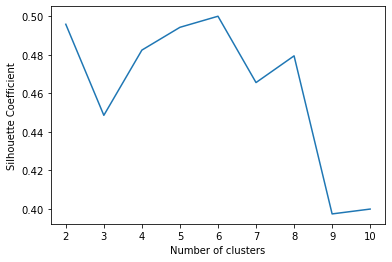

In [172]:
plt.plot(k_range,scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [173]:
from sklearn.metrics import silhouette_samples
sil_width = silhouette_samples(data_copy_scaled,labels_4)

In [174]:
kmeans4_dataset["sil_width"] = sil_width
kmeans4_dataset.head(5)

,Unnamed: 0,States,Health_indeces1,Health_indices2,Per_capita_income,GDP,Clus_kmeans,sil_width
0,0,Bachevo,417,66,564,1823,1,0.640494
1,1,Balgarchevo,1485,646,2710,73662,2,0.275477
2,2,Belasitsa,654,299,1104,27318,1,0.500480
3,3,Belo_Pole,192,25,573,250,1,0.655487
4,4,Beslen,43,8,528,22,1,0.657831


In [175]:
silhouette_samples(data_copy_scaled,labels_4).min()

-0.10901878309559751

## Number of clusters = 3

In [176]:
km_3 = KMeans(n_clusters=3,random_state=123)

In [177]:
km_3.fit(data_copy_scaled)
km_3.labels_

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 1, 1,
       1, 0, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 0, 1, 2, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int3

In [178]:
pd.Series(km_3.labels_).value_counts()

1    115
0     98
2     84
dtype: int64

In [179]:
kmeans1_dataset=data.copy()

In [185]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)

y_kmeans = kmeans.fit_predict(data_copy_scaled)

y_kmeans1 = y_kmeans + 1

clusters = pd.DataFrame(y_kmeans1)

kmeans1_dataset['clusters'] = clusters  # Corrected variable name

kmeans_mean_cluster = pd.DataFrame(round(kmeans1_dataset.groupby('clusters').mean(), 1))

kmeans_mean_cluster


,Unnamed: 0,Health_indeces1,Health_indices2,Per_capita_income,GDP
clusters,,,,,
1,172.4,4888.8,1206.3,3382.7,380146.7
2,218.5,2596.5,794.9,2515.3,142858.9
3,73.2,697.0,172.0,821.1,20498.1


In [186]:
def ClusterPercentage(datafr,name):
    size = pd.Series(datafr[name].value_counts().sort_index())
    percent = pd.Series(round(datafr[name].value_counts()/datafr.shape[0] * 100,2)).sort_index()
    size_df = pd.concat([size, percent],axis=1)
    size_df.columns = ["Cluster_Size","Cluster_Percentage"]
    return(size_df)

In [188]:
ClusterPercentage(kmeans1_dataset,"clusters")

,Cluster_Size,Cluster_Percentage
1,98,33.00
2,86,28.96
3,113,38.05


In [189]:
cluster_3_T = kmeans_mean_cluster.T

In [190]:
cluster_3_T

clusters,1,2,3
Unnamed: 0,172.4,218.5,73.2
Health_indeces1,4888.8,2596.5,697.0
Health_indices2,1206.3,794.9,172.0
Per_capita_income,3382.7,2515.3,821.1
GDP,380146.7,142858.9,20498.1


##  5. Describe cluster profiles for the clusters defined. Recommend different priority based actions that need to be taken for different clusters on the bases of their vulnerability situations according to their Economic and Health Conditions.

In [191]:
aggdata=cluster3_dataset.groupby('clusters-3').mean()
aggdata['Freq']=cluster3_dataset['clusters-3'].value_counts().sort_index()
aggdata

,Unnamed: 0,Health_indeces1,Health_indices2,Per_capita_income,GDP,Freq
clusters-3,,,,,,
1,74.884892,1077.697842,298.158273,1170.741007,45183.920863,139
2,215.402778,3630.166667,1023.145833,2909.652778,264215.500000,144
3,180.642857,7757.928571,1230.857143,4205.785714,537781.071429,14


In [192]:
aggdata.T

clusters-3,1,2,3
Unnamed: 0,74.884892,215.402778,180.642857
Health_indeces1,1077.697842,3630.166667,7757.928571
Health_indices2,298.158273,1023.145833,1230.857143
Per_capita_income,1170.741007,2909.652778,4205.785714
GDP,45183.920863,264215.500000,537781.071429
Freq,139.000000,144.000000,14.000000
